In [1]:
import ROOT
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import numpy as np
import pdb
from array import array

Welcome to JupyROOT 6.26/06


In [2]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746


In [44]:
#runs = ['23727','23735','23737','23738','23739','23740','23743','23745']
cent = '50-60'
lowbound = {'0-5': 550, '5-10':450, '10-20':340, '20-30':230, '30-40':140, '40-50':85, '50-60':50}
highbound = {'0-5': 900, '5-10':750, '10-20':570, '20-30':370, '30-40':250, '40-50':162, '50-60':95}
starmean = {'0-5': 620, '5-10':515, '10-20':402, '20-30':279, '30-40':187, '40-50':118, '50-60':70}
phenixmean = {'0-5': 599, '5-10':498.7, '10-20':367.8, '20-30':248.5, '30-40':162.7, '40-50':101.1, '50-60':58.6}
staruncert = {'0-5': 33, '5-10':28, '10-20':21, '20-30':15, '30-40':10, '40-50':6, '50-60':4}
phenixuncert = {'0-5': 24.7, '5-10':28.9, '10-20':23.1, '20-30':17.5, '30-40':13.5, '40-50':9.8, '50-60':7.4}

f1 = ROOT.TFile.Open("MC/dETdeta_analysis_allruns_hijing_run14_nozs_mc_reweight_"+cent+"_reweight_hijing.root")
h_eT_truth = TH1F(f1.Get("hetdeta_ihcalbin"))
h_eT_truth_ihcalbin = TH1F(f1.Get("hetdeta_ihcalbin"))
h_eT_truth_ohcalbin = TH1F(f1.Get("hetdeta_ohcalbin"))
h_eT_truth_calobin = TH1F(f1.Get("hetdeta_calobin"))
h_eT_sim_emcal = TH1F(f1.Get("h_eT_emcal"))
h_eT_sim_ihcal = TH1F(f1.Get("h_eT_ihcal"))
h_eT_sim_ohcal = TH1F(f1.Get("h_eT_ohcal"))
h_eT_sim_calo = TH1F(f1.Get("h_eT_calo"))
h_eT_truth.SetDirectory(0)
h_eT_truth_ihcalbin.SetDirectory(0)
h_eT_truth_ohcalbin.SetDirectory(0)
h_eT_truth_calobin.SetDirectory(0)
h_eT_sim_emcal.SetDirectory(0)
h_eT_sim_ihcal.SetDirectory(0)
h_eT_sim_ohcal.SetDirectory(0)
h_eT_sim_calo.SetDirectory(0)
f1.Close()
f2 = ROOT.TFile.Open("new_cent_bins/dETdeta_analysis_allruns_HCal_zs_30ADC_EMCal_zs_40ADC_data_noweight_"+cent+".root")
h_eT_data_emcal = TH1F(f2.Get("h_eT_emcal"))
h_eT_data_ihcal = TH1F(f2.Get("h_eT_ihcal"))
h_eT_data_ohcal = TH1F(f2.Get("h_eT_ohcal"))
h_eT_data_calo = TH1F(f2.Get("h_eT_calo"))
h_eT_data_emcal.SetDirectory(0)
h_eT_data_ihcal.SetDirectory(0)
h_eT_data_ohcal.SetDirectory(0)
h_eT_data_calo.SetDirectory(0)
f2.Close()
f3 = ROOT.TFile.Open("MC/dETdeta_analysis_allruns_run14_nozs_mc_reweight_"+cent+"_reweight_epos.root")
h_eT_truth_epos = TH1F(f3.Get("hetdeta_ihcalbin"))
h_eT_truth_ihcalbin_epos = TH1F(f3.Get("hetdeta_ihcalbin"))
h_eT_truth_ohcalbin_epos = TH1F(f3.Get("hetdeta_ohcalbin"))
h_eT_truth_calobin_epos = TH1F(f3.Get("hetdeta_calobin"))
h_eT_epos_emcal = TH1F(f3.Get("h_eT_emcal"))
h_eT_epos_ihcal = TH1F(f3.Get("h_eT_ihcal"))
h_eT_epos_ohcal = TH1F(f3.Get("h_eT_ohcal"))
h_eT_epos_calo = TH1F(f3.Get("h_eT_calo"))
h_eT_truth_epos.SetDirectory(0)
h_eT_truth_ihcalbin_epos.SetDirectory(0)
h_eT_truth_ohcalbin_epos.SetDirectory(0)
h_eT_truth_calobin_epos.SetDirectory(0)
h_eT_epos_emcal.SetDirectory(0)
h_eT_epos_ihcal.SetDirectory(0)
h_eT_epos_ohcal.SetDirectory(0)
h_eT_epos_calo.SetDirectory(0)
f3.Close()
f4 = ROOT.TFile.Open("MC/dETdeta_analysis_allruns_run14_nozs_mc_reweight_"+cent+"_reweight_ampt.root")
h_eT_truth_ampt = TH1F(f4.Get("hetdeta_ihcalbin"))
h_eT_truth_ihcalbin_ampt = TH1F(f4.Get("hetdeta_ihcalbin"))
h_eT_truth_ohcalbin_ampt = TH1F(f4.Get("hetdeta_ohcalbin"))
h_eT_truth_calobin_ampt = TH1F(f4.Get("hetdeta_calobin"))
h_eT_ampt_emcal = TH1F(f4.Get("h_eT_emcal"))
h_eT_ampt_ihcal = TH1F(f4.Get("h_eT_ihcal"))
h_eT_ampt_ohcal = TH1F(f4.Get("h_eT_ohcal"))
h_eT_ampt_calo = TH1F(f4.Get("h_eT_calo"))
h_eT_truth_ampt.SetDirectory(0)
h_eT_truth_ihcalbin_ampt.SetDirectory(0)
h_eT_truth_ohcalbin_ampt.SetDirectory(0)
h_eT_truth_calobin_ampt.SetDirectory(0)
h_eT_ampt_emcal.SetDirectory(0)
h_eT_ampt_ihcal.SetDirectory(0)
h_eT_ampt_ohcal.SetDirectory(0)
h_eT_ampt_calo.SetDirectory(0)
f4.Close()
f5 = ROOT.TFile.Open("dETdeta_total_variation_"+cent+".root")
emcal_unc = TH1F(f5.Get("emcal_detdeta_dev"))
ihcal_unc = TH1F(f5.Get("ihcal_detdeta_dev"))
ohcal_unc = TH1F(f5.Get("ohcal_detdeta_dev"))
calo_unc = TH1F(f5.Get("calo_detdeta_dev"))
emcal_unc.SetDirectory(0)
ihcal_unc.SetDirectory(0)
ohcal_unc.SetDirectory(0)
calo_unc.SetDirectory(0)
f5.Close()

Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/emcal_reco_0-5.png has been created


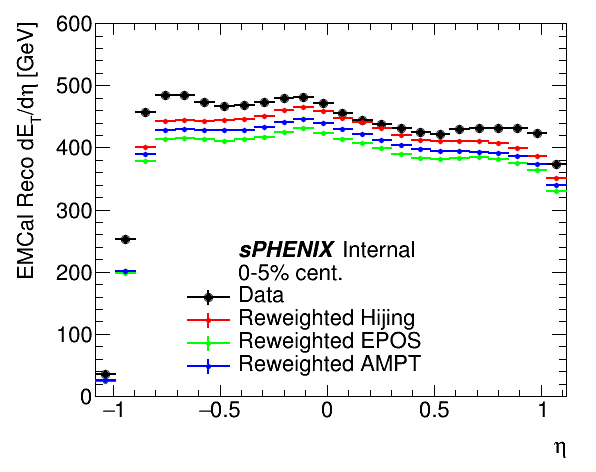

In [5]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.3,.6,.7,.89)
if cent == '0-5' or cent == '5-10':
    leg = ROOT.TLegend(.3,.2,.7,.49)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry(h_eT_data_emcal,"Data","lep")
leg.AddEntry(h_eT_sim_emcal,"Reweighted Hijing","lep")
leg.AddEntry(h_eT_epos_emcal,"Reweighted EPOS","lep")
leg.AddEntry(h_eT_ampt_emcal,"Reweighted AMPT","lep")
leg.SetBorderSize(0)
h_eT_data_emcal.SetLineColor(1)
h_eT_sim_emcal.SetLineColor(2)
h_eT_ampt_emcal.SetLineColor(4)
h_eT_epos_emcal.SetLineColor(3)
h_eT_data_emcal.SetMarkerStyle(20)
h_eT_sim_emcal.SetMarkerStyle(8)
h_eT_sim_emcal.SetMarkerSize(0.7)
h_eT_sim_emcal.SetMarkerColor(2)
h_eT_ampt_emcal.SetMarkerStyle(8)
h_eT_ampt_emcal.SetMarkerSize(0.7)
h_eT_ampt_emcal.SetMarkerColor(4)
h_eT_epos_emcal.SetMarkerStyle(8)
h_eT_epos_emcal.SetMarkerSize(0.7)
h_eT_epos_emcal.SetMarkerColor(3)
h_eT_data_emcal.GetYaxis().SetRangeUser(0,600)
h_eT_data_emcal.SetStats(0)
h_eT_sim_emcal.SetStats(0)
h_eT_epos_emcal.SetStats(0)
h_eT_ampt_emcal.SetStats(0)
h_eT_data_emcal.SetYTitle("EMCal Reco dE_{T}/d#eta [GeV]")
h_eT_data_emcal.SetXTitle("#eta")
h_eT_data_emcal.Draw()
h_eT_sim_emcal.Draw('same')
h_eT_epos_emcal.Draw('same')
h_eT_ampt_emcal.Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/emcal_reco_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/ihcal_reco_50-60.png has been created


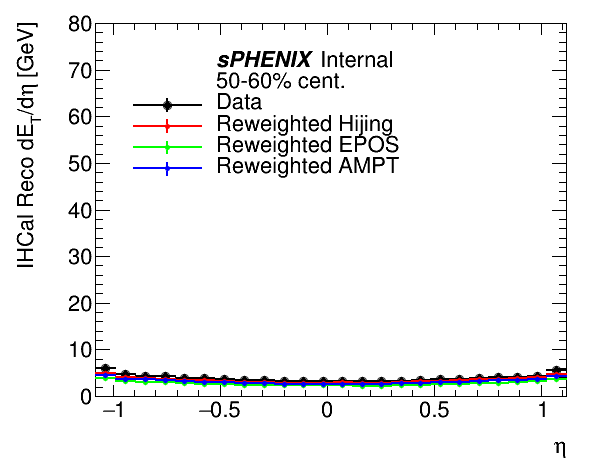

In [220]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.2,.62,.85,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry(h_eT_data_ihcal,"Data","lep")
leg.AddEntry(h_eT_sim_ihcal,"Reweighted Hijing","lep")
leg.AddEntry(h_eT_epos_ihcal,"Reweighted EPOS","lep")
leg.AddEntry(h_eT_ampt_ihcal,"Reweighted AMPT","lep")
leg.SetBorderSize(0)
h_eT_data_ihcal.SetStats(0)
h_eT_sim_ihcal.SetStats(0)
h_eT_epos_ihcal.SetStats(0)
h_eT_ampt_ihcal.SetStats(0)
h_eT_data_ihcal.SetYTitle("IHCal Reco dE_{T}/d#eta [GeV]")
h_eT_data_ihcal.SetXTitle("#eta")
h_eT_data_ihcal.GetXaxis().SetRangeUser(-1.05,1.1)
h_eT_sim_ihcal.GetXaxis().SetRangeUser(-1.05,1.1)
h_eT_epos_ihcal.GetXaxis().SetRangeUser(-1.05,1.1)
h_eT_ampt_ihcal.GetXaxis().SetRangeUser(-1.05,1.1)
h_eT_data_ihcal.GetYaxis().SetRangeUser(0,80)
h_eT_sim_ihcal.GetYaxis().SetRangeUser(0,80)
h_eT_epos_ihcal.GetYaxis().SetRangeUser(0,80)
h_eT_ampt_ihcal.GetYaxis().SetRangeUser(0,80)
h_eT_data_ihcal.SetLineColor(1)
h_eT_sim_ihcal.SetLineColor(2)
h_eT_epos_ihcal.SetLineColor(3)
h_eT_ampt_ihcal.SetLineColor(4)
h_eT_data_ihcal.SetMarkerStyle(20)
h_eT_sim_ihcal.SetMarkerStyle(8)
h_eT_sim_ihcal.SetMarkerSize(0.7)
h_eT_sim_ihcal.SetMarkerColor(2)
h_eT_ampt_ihcal.SetMarkerStyle(8)
h_eT_ampt_ihcal.SetMarkerSize(0.7)
h_eT_ampt_ihcal.SetMarkerColor(4)
h_eT_epos_ihcal.SetMarkerStyle(8)
h_eT_epos_ihcal.SetMarkerSize(0.7)
h_eT_epos_ihcal.SetMarkerColor(3)
h_eT_data_ihcal.Draw()
h_eT_sim_ihcal.Draw('same')
h_eT_epos_ihcal.Draw('same')
h_eT_ampt_ihcal.Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/ihcal_reco_'+cent+'.png')

Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/ohcal_reco_0-5.png has been created


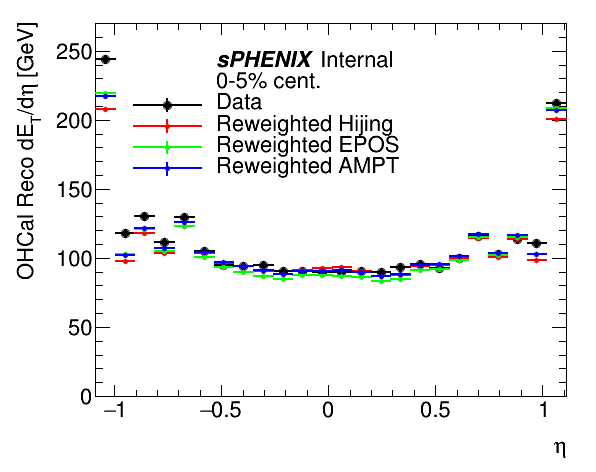

In [6]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.2,.62,.85,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry(h_eT_data_ohcal,"Data","lep")
leg.AddEntry(h_eT_sim_ohcal,"Reweighted Hijing","lep")
leg.AddEntry(h_eT_epos_ohcal,"Reweighted EPOS","lep")
leg.AddEntry(h_eT_ampt_ohcal,"Reweighted AMPT","lep")
leg.SetBorderSize(0)
h_eT_data_ohcal.SetStats(0)
h_eT_sim_ohcal.SetStats(0)
h_eT_epos_ohcal.SetStats(0)
h_eT_ampt_ohcal.SetStats(0)
h_eT_data_ohcal.SetYTitle("OHCal Reco dE_{T}/d#eta [GeV]")
h_eT_data_ohcal.SetXTitle("#eta")
h_eT_data_ohcal.GetYaxis().SetRangeUser(0,270)
h_eT_sim_ohcal.GetYaxis().SetRangeUser(0,270)
h_eT_epos_ohcal.GetXaxis().SetRangeUser(-1.05,1.1)
h_eT_epos_ohcal.GetYaxis().SetRangeUser(0,270)
h_eT_ampt_ohcal.GetYaxis().SetRangeUser(0,270)
h_eT_data_ohcal.GetXaxis().SetRangeUser(-1.05,1.1)
h_eT_sim_ohcal.GetXaxis().SetRangeUser(-1.05,1.1)
h_eT_ampt_ohcal.GetXaxis().SetRangeUser(-1.05,1.1)
h_eT_data_ohcal.SetLineColor(1)
h_eT_sim_ohcal.SetLineColor(2)
h_eT_epos_ohcal.SetLineColor(3)
h_eT_ampt_ohcal.SetLineColor(4)
h_eT_data_ohcal.SetMarkerStyle(20)
h_eT_sim_ohcal.SetMarkerStyle(8)
h_eT_sim_ohcal.SetMarkerSize(0.7)
h_eT_sim_ohcal.SetMarkerColor(2)
h_eT_ampt_ohcal.SetMarkerStyle(8)
h_eT_ampt_ohcal.SetMarkerSize(0.7)
h_eT_ampt_ohcal.SetMarkerColor(4)
h_eT_epos_ohcal.SetMarkerStyle(8)
h_eT_epos_ohcal.SetMarkerSize(0.7)
h_eT_epos_ohcal.SetMarkerColor(3)
h_eT_data_ohcal.Draw()
h_eT_sim_ohcal.Draw('same')
h_eT_epos_ohcal.Draw('same')
h_eT_ampt_ohcal.Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/ohcal_reco_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/calo_reco_50-60.png has been created


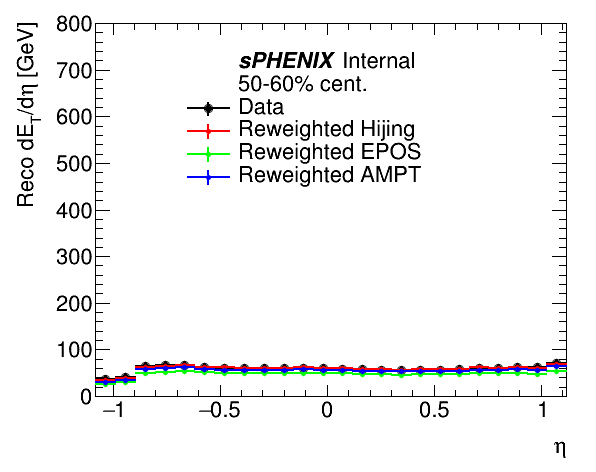

In [222]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.3,.6,.7,.89)
if cent == '0-5' or cent == '5-10':
    leg = ROOT.TLegend(.3,.2,.7,.49)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry(h_eT_data_calo,"Data","lep")
leg.AddEntry(h_eT_sim_calo,"Reweighted Hijing","lep")
leg.AddEntry(h_eT_epos_calo,"Reweighted EPOS","lep")
leg.AddEntry(h_eT_ampt_calo,"Reweighted AMPT","lep")
leg.SetBorderSize(0)
h_eT_data_calo.SetLineColor(1)
h_eT_sim_calo.SetLineColor(2)
h_eT_ampt_calo.SetLineColor(4)
h_eT_epos_calo.SetLineColor(3)
h_eT_data_calo.SetMarkerStyle(20)
h_eT_sim_calo.SetMarkerStyle(8)
h_eT_sim_calo.SetMarkerSize(0.7)
h_eT_sim_calo.SetMarkerColor(2)
h_eT_ampt_calo.SetMarkerStyle(8)
h_eT_ampt_calo.SetMarkerSize(0.7)
h_eT_ampt_calo.SetMarkerColor(4)
h_eT_epos_calo.SetMarkerStyle(8)
h_eT_epos_calo.SetMarkerSize(0.7)
h_eT_epos_calo.SetMarkerColor(3)
h_eT_data_calo.GetYaxis().SetRangeUser(0,800)
h_eT_data_calo.SetStats(0)
h_eT_sim_calo.SetStats(0)
h_eT_epos_calo.SetStats(0)
h_eT_ampt_calo.SetStats(0)
h_eT_data_calo.SetYTitle("Reco dE_{T}/d#eta [GeV]")
h_eT_data_calo.SetXTitle("#eta")
h_eT_data_calo.Draw()
h_eT_sim_calo.Draw('same')
h_eT_epos_calo.Draw('same')
h_eT_ampt_calo.Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/calo_reco_'+cent+'.png')

In [45]:
emcal_ratio_hijing = TH1F(h_eT_sim_emcal.Clone("emcal_ratio_hijing"))
emcal_ratio_hijing.Divide(h_eT_truth)
emcal_detdeta_hijing = TH1F(h_eT_data_emcal.Clone("emcal_detdeta_hijing"))
emcal_detdeta_hijing.Divide(emcal_ratio_hijing)
emcal_ratio_epos = TH1F(h_eT_epos_emcal.Clone("emcal_ratio_epos"))
emcal_ratio_epos.Divide(h_eT_truth_epos)
emcal_detdeta_epos = TH1F(h_eT_data_emcal.Clone("emcal_detdeta_epos"))
emcal_detdeta_epos.Divide(emcal_ratio_epos)
emcal_ratio_ampt = TH1F(h_eT_ampt_emcal.Clone("emcal_ratio_ampt"))
emcal_ratio_ampt.Divide(h_eT_truth_ampt)
emcal_detdeta_ampt = TH1F(h_eT_data_emcal.Clone("emcal_detdeta_ampt"))
emcal_detdeta_ampt.Divide(emcal_ratio_ampt)

ihcal_ratio_hijing = TH1F(h_eT_sim_ihcal.Clone("ihcal_ratio_hijing"))
ihcal_ratio_hijing.Divide(h_eT_truth_ihcalbin)
ihcal_detdeta_hijing = TH1F(h_eT_data_ihcal.Clone("ihcal_detdeta_hijing"))
ihcal_detdeta_hijing.Divide(ihcal_ratio_hijing)
ihcal_ratio_epos = TH1F(h_eT_epos_ihcal.Clone("ihcal_ratio_epos"))
ihcal_ratio_epos.Divide(h_eT_truth_ihcalbin_epos)
ihcal_detdeta_epos = TH1F(h_eT_data_ihcal.Clone("ihcal_detdeta_epos"))
ihcal_detdeta_epos.Divide(ihcal_ratio_epos)
ihcal_ratio_ampt = TH1F(h_eT_ampt_ihcal.Clone("ihcal_ratio_ampt"))
ihcal_ratio_ampt.Divide(h_eT_truth_ihcalbin_ampt)
ihcal_detdeta_ampt = TH1F(h_eT_data_ihcal.Clone("ihcal_detdeta_ampt"))
ihcal_detdeta_ampt.Divide(ihcal_ratio_ampt)

ohcal_ratio_hijing = TH1F(h_eT_sim_ohcal.Clone("ohcal_ratio_hijing"))
ohcal_ratio_hijing.Divide(h_eT_truth_ohcalbin)
ohcal_detdeta_hijing = TH1F(h_eT_data_ohcal.Clone("ohcal_detdeta_hijing"))
ohcal_detdeta_hijing.Divide(ohcal_ratio_hijing)
ohcal_ratio_epos = TH1F(h_eT_epos_ohcal.Clone("ohcal_ratio_epos"))
ohcal_ratio_epos.Divide(h_eT_truth_ohcalbin_epos)
ohcal_detdeta_epos = TH1F(h_eT_data_ohcal.Clone("ohcal_detdeta_epos"))
ohcal_detdeta_epos.Divide(ohcal_ratio_epos)
ohcal_ratio_ampt = TH1F(h_eT_ampt_ohcal.Clone("ohcal_ratio_ampt"))
ohcal_ratio_ampt.Divide(h_eT_truth_ohcalbin_ampt)
ohcal_detdeta_ampt = TH1F(h_eT_data_ohcal.Clone("ohcal_detdeta_ampt"))
ohcal_detdeta_ampt.Divide(ohcal_ratio_ampt)

calo_ratio_hijing = TH1F(h_eT_sim_calo.Clone("calo_ratio_hijing"))
calo_ratio_hijing.Divide(h_eT_truth_calobin)
calo_detdeta_hijing = TH1F(h_eT_data_calo.Clone("calo_detdeta_hijing"))
calo_detdeta_hijing.Divide(calo_ratio_hijing)
calo_ratio_epos = TH1F(h_eT_epos_calo.Clone("calo_ratio_epos"))
calo_ratio_epos.Divide(h_eT_truth_calobin_epos)
calo_detdeta_epos = TH1F(h_eT_data_calo.Clone("calo_detdeta_epos"))
calo_detdeta_epos.Divide(calo_ratio_epos)
calo_ratio_ampt = TH1F(h_eT_ampt_calo.Clone("calo_ratio_ampt"))
calo_ratio_ampt.Divide(h_eT_truth_calobin_ampt)
calo_detdeta_ampt = TH1F(h_eT_data_calo.Clone("calo_detdeta_ampt"))
calo_detdeta_ampt.Divide(calo_ratio_ampt)

True

In [46]:
for i in range(1, 3):
    emcal_detdeta_hijing.SetBinContent(i,0)
    emcal_detdeta_hijing.SetBinError(i,0)
    emcal_detdeta_epos.SetBinContent(i,0)
    emcal_detdeta_epos.SetBinError(i,0)
    emcal_detdeta_ampt.SetBinContent(i,0)
    emcal_detdeta_ampt.SetBinError(i,0)
    calo_detdeta_hijing.SetBinContent(i,0)
    calo_detdeta_hijing.SetBinError(i,0)
    calo_detdeta_epos.SetBinContent(i,0)
    calo_detdeta_epos.SetBinError(i,0)
    calo_detdeta_ampt.SetBinContent(i,0)
    calo_detdeta_ampt.SetBinError(i,0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: emcal_corr
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/emcal_correction_factor_50-60.png has been created


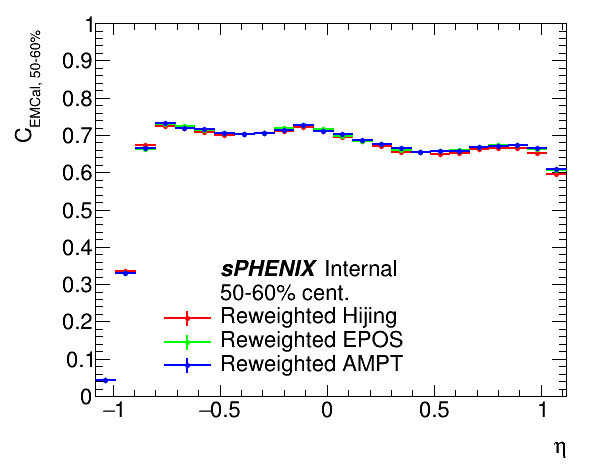

In [225]:
emcal_corr_canvas = TCanvas("emcal_corr","",600,500)
emcal_corr_leg = ROOT.TLegend(.26,.2,.7,.45)
emcal_corr_leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
emcal_corr_leg.AddEntry("",f"{cent}% cent.","")
emcal_corr_leg.AddEntry(emcal_ratio_hijing,"Reweighted Hijing","lep")
emcal_corr_leg.AddEntry(emcal_ratio_epos,"Reweighted EPOS","lep")
emcal_corr_leg.AddEntry(emcal_ratio_ampt,"Reweighted AMPT","lep")
emcal_corr_leg.SetBorderSize(0)
emcal_ratio_hijing.SetMarkerStyle(20)
emcal_ratio_hijing.SetLineColor(2)
emcal_ratio_hijing.SetMarkerColor(2)
emcal_ratio_epos.SetMarkerStyle(20)
emcal_ratio_epos.SetLineColor(3)
emcal_ratio_epos.SetMarkerColor(3)
emcal_ratio_ampt.SetMarkerStyle(20)
emcal_ratio_ampt.SetLineColor(4)
emcal_ratio_ampt.SetMarkerColor(4)
emcal_ratio_hijing.GetYaxis().SetRangeUser(0,1)
emcal_ratio_epos.GetYaxis().SetRangeUser(0,1)
emcal_ratio_ampt.GetYaxis().SetRangeUser(0,1)
emcal_ratio_hijing.GetXaxis().SetRangeUser(-1.05,1.1)
emcal_ratio_epos.GetXaxis().SetRangeUser(-1.05,1.1)
emcal_ratio_ampt.GetXaxis().SetRangeUser(-1.05,1.1)
emcal_ratio_hijing.SetStats(0)
emcal_ratio_epos.SetStats(0)
emcal_ratio_ampt.SetStats(0)
emcal_ratio_hijing.SetYTitle("C_{EMCal, "+cent+"%}")
emcal_ratio_hijing.SetXTitle("#eta")
emcal_ratio_hijing.Draw()
emcal_ratio_epos.Draw("same")
emcal_ratio_ampt.Draw("same")
emcal_corr_leg.Draw()
emcal_corr_canvas.Draw()
emcal_corr_canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/emcal_correction_factor_'+cent+'.png')                

Warning in <TCanvas::Constructor>: Deleting canvas with same name: ihcal_corr
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/ihcal_correction_factor_50-60.png has been created


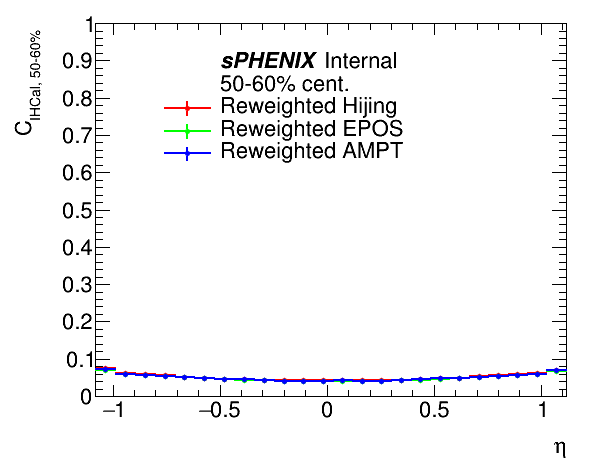

In [226]:
ihcal_corr_canvas = TCanvas("ihcal_corr","",600,500)
ihcal_corr_leg = ROOT.TLegend(.26,.65,.7,.89)
ihcal_corr_leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
ihcal_corr_leg.AddEntry("",f"{cent}% cent.","")
ihcal_corr_leg.AddEntry(ihcal_ratio_hijing,"Reweighted Hijing","lep")
ihcal_corr_leg.AddEntry(ihcal_ratio_epos,"Reweighted EPOS","lep")
ihcal_corr_leg.AddEntry(ihcal_ratio_ampt,"Reweighted AMPT","lep")
ihcal_corr_leg.SetBorderSize(0)
ihcal_ratio_hijing.SetMarkerStyle(20)
ihcal_ratio_hijing.SetLineColor(2)
ihcal_ratio_hijing.SetMarkerColor(2)
ihcal_ratio_epos.SetMarkerStyle(20)
ihcal_ratio_epos.SetLineColor(3)
ihcal_ratio_epos.SetMarkerColor(3)
ihcal_ratio_ampt.SetMarkerStyle(20)
ihcal_ratio_ampt.SetLineColor(4)
ihcal_ratio_ampt.SetMarkerColor(4)
ihcal_ratio_hijing.GetYaxis().SetRangeUser(0,1)
ihcal_ratio_epos.GetYaxis().SetRangeUser(0,1)
ihcal_ratio_ampt.GetYaxis().SetRangeUser(0,1)
ihcal_ratio_hijing.GetXaxis().SetRangeUser(-1.05,1.1)
ihcal_ratio_epos.GetXaxis().SetRangeUser(-1.05,1.1)
ihcal_ratio_ampt.GetXaxis().SetRangeUser(-1.05,1.1)
ihcal_ratio_hijing.SetStats(0)
ihcal_ratio_epos.SetStats(0)
ihcal_ratio_ampt.SetStats(0)
ihcal_ratio_hijing.SetYTitle("C_{IHCal, "+cent+"%}")
ihcal_ratio_hijing.SetXTitle("#eta")
ihcal_ratio_hijing.Draw()
ihcal_ratio_epos.Draw("same")
ihcal_ratio_ampt.Draw("same")
ihcal_corr_leg.Draw()
ihcal_corr_canvas.Draw()
ihcal_corr_canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/ihcal_correction_factor_'+cent+'.png')                

Warning in <TCanvas::Constructor>: Deleting canvas with same name: ohcal_corr
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/ohcal_correction_factor_50-60.png has been created


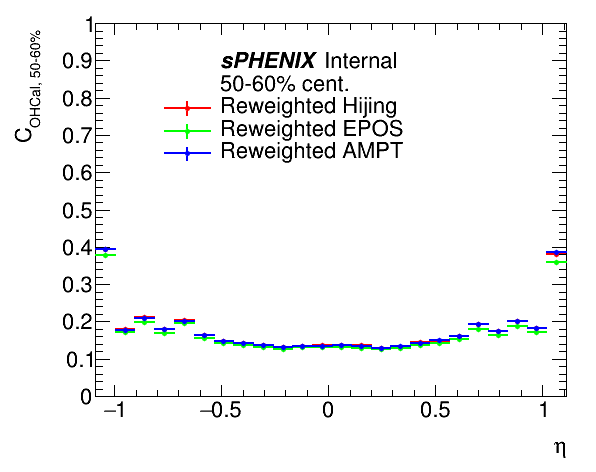

In [227]:
ohcal_corr_canvas = TCanvas("ohcal_corr","",600,500)
ohcal_corr_leg = ROOT.TLegend(.26,.65,.7,.89)
ohcal_corr_leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
ohcal_corr_leg.AddEntry("",f"{cent}% cent.","")
ohcal_corr_leg.AddEntry(ohcal_ratio_hijing,"Reweighted Hijing","lep")
ohcal_corr_leg.AddEntry(ohcal_ratio_epos,"Reweighted EPOS","lep")
ohcal_corr_leg.AddEntry(ohcal_ratio_ampt,"Reweighted AMPT","lep")
ohcal_corr_leg.SetBorderSize(0)
ohcal_ratio_hijing.SetMarkerStyle(20)
ohcal_ratio_hijing.SetLineColor(2)
ohcal_ratio_hijing.SetMarkerColor(2)
ohcal_ratio_epos.SetMarkerStyle(20)
ohcal_ratio_epos.SetLineColor(3)
ohcal_ratio_epos.SetMarkerColor(3)
ohcal_ratio_ampt.SetMarkerStyle(20)
ohcal_ratio_ampt.SetLineColor(4)
ohcal_ratio_ampt.SetMarkerColor(4)
ohcal_ratio_hijing.GetYaxis().SetRangeUser(0,1)
ohcal_ratio_epos.GetYaxis().SetRangeUser(0,1)
ohcal_ratio_ampt.GetYaxis().SetRangeUser(0,1)
ohcal_ratio_hijing.GetXaxis().SetRangeUser(-1.05,1.1)
ohcal_ratio_epos.GetXaxis().SetRangeUser(-1.05,1.1)
ohcal_ratio_ampt.GetXaxis().SetRangeUser(-1.05,1.1)
ohcal_ratio_hijing.SetStats(0)
ohcal_ratio_epos.SetStats(0)
ohcal_ratio_ampt.SetStats(0)
ohcal_ratio_hijing.SetYTitle("C_{OHCal, "+cent+"%}")
ohcal_ratio_hijing.SetXTitle("#eta")
ohcal_ratio_hijing.Draw()
ohcal_ratio_epos.Draw("same")
ohcal_ratio_ampt.Draw("same")
ohcal_corr_leg.Draw()
ohcal_corr_canvas.Draw()
ohcal_corr_canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/ohcal_correction_factor_'+cent+'.png')             

Warning in <TCanvas::Constructor>: Deleting canvas with same name: calo_corr
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/calo_correction_factor_50-60.png has been created


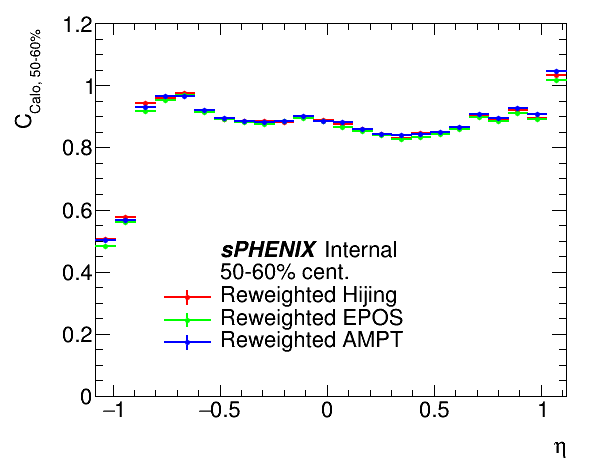

In [228]:
calo_corr_canvas = TCanvas("calo_corr","",600,500)
calo_corr_leg = ROOT.TLegend(.26,.25,.7,.49)
calo_corr_leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
calo_corr_leg.AddEntry("",f"{cent}% cent.","")
calo_corr_leg.AddEntry(calo_ratio_hijing,"Reweighted Hijing","lep")
calo_corr_leg.AddEntry(calo_ratio_epos,"Reweighted EPOS","lep")
calo_corr_leg.AddEntry(calo_ratio_ampt,"Reweighted AMPT","lep")
calo_corr_leg.SetBorderSize(0)
calo_ratio_hijing.SetMarkerStyle(20)
calo_ratio_hijing.SetLineColor(2)
calo_ratio_hijing.SetMarkerColor(2)
calo_ratio_epos.SetMarkerStyle(20)
calo_ratio_epos.SetLineColor(3)
calo_ratio_epos.SetMarkerColor(3)
calo_ratio_ampt.SetMarkerStyle(20)
calo_ratio_ampt.SetLineColor(4)
calo_ratio_ampt.SetMarkerColor(4)
calo_ratio_hijing.GetYaxis().SetRangeUser(0,1.2)
calo_ratio_epos.GetYaxis().SetRangeUser(0,1.2)
calo_ratio_ampt.GetYaxis().SetRangeUser(0,1.2)
calo_ratio_hijing.GetXaxis().SetRangeUser(-1.05,1.1)
calo_ratio_epos.GetXaxis().SetRangeUser(-1.05,1.1)
calo_ratio_ampt.GetXaxis().SetRangeUser(-1.05,1.1)
calo_ratio_hijing.SetStats(0)
calo_ratio_epos.SetStats(0)
calo_ratio_ampt.SetStats(0)
calo_ratio_hijing.SetYTitle("C_{Calo, "+cent+"%}")
calo_ratio_hijing.SetXTitle("#eta")
calo_ratio_hijing.Draw()
calo_ratio_epos.Draw("same")
calo_ratio_ampt.Draw("same")
calo_corr_leg.Draw()
calo_corr_canvas.Draw()
calo_corr_canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/calo_correction_factor_'+cent+'.png')             

In [47]:
emcal_hijing_errors = ROOT.TGraphErrors()
emcal_epos_errors = ROOT.TGraphErrors()
emcal_ampt_errors = ROOT.TGraphErrors()
for i in range(emcal_detdeta_hijing.GetNbinsX()):
    error = emcal_unc.GetBinContent(i + 1)
    x = emcal_detdeta_hijing.GetBinCenter(i + 1)
    y = emcal_detdeta_hijing.GetBinContent(i + 1)
    bin_width = emcal_detdeta_hijing.GetBinWidth(i + 1)
    emcal_hijing_errors.SetPoint(i, x, y)
    emcal_hijing_errors.SetPointError(i, bin_width/2, error) 
    x = emcal_detdeta_epos.GetBinCenter(i + 1)
    y = emcal_detdeta_epos.GetBinContent(i + 1)
    bin_width = emcal_detdeta_epos.GetBinWidth(i + 1)
    emcal_epos_errors.SetPoint(i, x, y)
    emcal_epos_errors.SetPointError(i, bin_width/2, error) 
    x = emcal_detdeta_ampt.GetBinCenter(i + 1)
    y = emcal_detdeta_ampt.GetBinContent(i + 1)
    bin_width = emcal_detdeta_ampt.GetBinWidth(i + 1)
    emcal_ampt_errors.SetPoint(i, x, y)
    emcal_ampt_errors.SetPointError(i, bin_width/2, error) 
    
ihcal_hijing_errors = ROOT.TGraphErrors()
ihcal_epos_errors = ROOT.TGraphErrors()
ihcal_ampt_errors = ROOT.TGraphErrors()
for i in range(ihcal_detdeta_hijing.GetNbinsX()):
    error = ihcal_unc.GetBinContent(i + 1)
    x = ihcal_detdeta_hijing.GetBinCenter(i + 1)
    y = ihcal_detdeta_hijing.GetBinContent(i + 1)
    bin_width = ihcal_detdeta_hijing.GetBinWidth(i + 1)
    ihcal_hijing_errors.SetPoint(i, x, y)
    ihcal_hijing_errors.SetPointError(i, bin_width/2, error) 
    x = ihcal_detdeta_epos.GetBinCenter(i + 1)
    y = ihcal_detdeta_epos.GetBinContent(i + 1)
    bin_width = ihcal_detdeta_epos.GetBinWidth(i + 1)
    ihcal_epos_errors.SetPoint(i, x, y)
    ihcal_epos_errors.SetPointError(i, bin_width/2, error) 
    x = ihcal_detdeta_ampt.GetBinCenter(i + 1)
    y = ihcal_detdeta_ampt.GetBinContent(i + 1)
    bin_width = ihcal_detdeta_ampt.GetBinWidth(i + 1)
    ihcal_ampt_errors.SetPoint(i, x, y)
    ihcal_ampt_errors.SetPointError(i, bin_width/2, error) 
    
ohcal_hijing_errors = ROOT.TGraphErrors()
ohcal_epos_errors = ROOT.TGraphErrors()
ohcal_ampt_errors = ROOT.TGraphErrors()
for i in range(ohcal_detdeta_hijing.GetNbinsX()):
    error = ohcal_unc.GetBinContent(i + 1)
    x = ohcal_detdeta_hijing.GetBinCenter(i + 1)
    y = ohcal_detdeta_hijing.GetBinContent(i + 1)
    bin_width = ohcal_detdeta_hijing.GetBinWidth(i + 1)
    ohcal_hijing_errors.SetPoint(i, x, y)
    ohcal_hijing_errors.SetPointError(i, bin_width/2, error) 
    x = ohcal_detdeta_epos.GetBinCenter(i + 1)
    y = ohcal_detdeta_epos.GetBinContent(i + 1)
    bin_width = ohcal_detdeta_epos.GetBinWidth(i + 1)
    ohcal_epos_errors.SetPoint(i, x, y)
    ohcal_epos_errors.SetPointError(i, bin_width/2, error) 
    x = ohcal_detdeta_ampt.GetBinCenter(i + 1)
    y = ohcal_detdeta_ampt.GetBinContent(i + 1)
    bin_width = ohcal_detdeta_ampt.GetBinWidth(i + 1)
    ohcal_ampt_errors.SetPoint(i, x, y)
    ohcal_ampt_errors.SetPointError(i, bin_width/2, error) 
    
calo_hijing_errors = ROOT.TGraphErrors()
calo_epos_errors = ROOT.TGraphErrors()
calo_ampt_errors = ROOT.TGraphErrors()
for i in range(calo_detdeta_hijing.GetNbinsX()):
    error = calo_unc.GetBinContent(i + 1)
    x = calo_detdeta_hijing.GetBinCenter(i + 1)
    y = calo_detdeta_hijing.GetBinContent(i + 1)
    bin_width = calo_detdeta_hijing.GetBinWidth(i + 1)
    calo_hijing_errors.SetPoint(i, x, y)
    calo_hijing_errors.SetPointError(i, bin_width/2, error) 
    x = calo_detdeta_epos.GetBinCenter(i + 1)
    y = calo_detdeta_epos.GetBinContent(i + 1)
    bin_width = calo_detdeta_epos.GetBinWidth(i + 1)
    calo_epos_errors.SetPoint(i, x, y)
    calo_epos_errors.SetPointError(i, bin_width/2, error) 
    x = calo_detdeta_ampt.GetBinCenter(i + 1)
    y = calo_detdeta_ampt.GetBinContent(i + 1)
    bin_width = calo_detdeta_ampt.GetBinWidth(i + 1)
    calo_ampt_errors.SetPoint(i, x, y)
    calo_ampt_errors.SetPointError(i, bin_width/2, error) 
    
    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/detdeta_reweight_hijing_50-60.png has been created


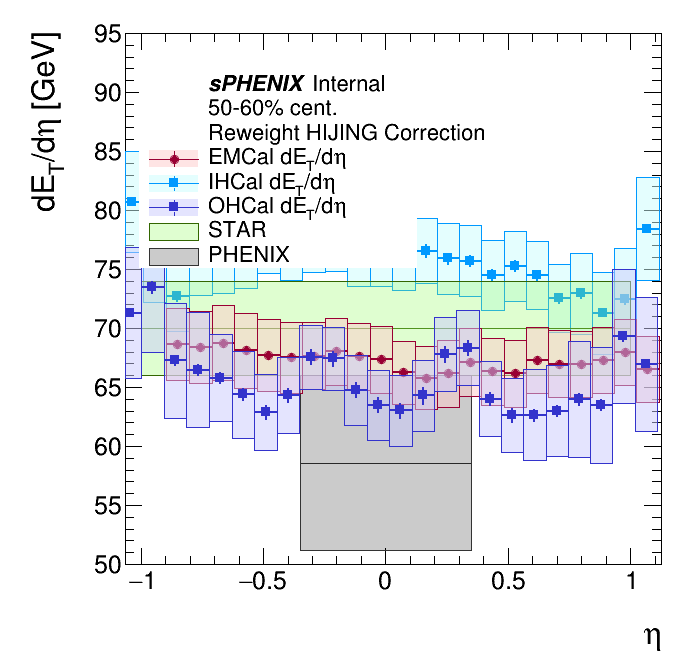

In [48]:
canvas = TCanvas("canvas","",700,700)
leg = ROOT.TLegend(.2,.6,.6,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry("","Reweight HIJING Correction ","")
leg.AddEntry(emcal_hijing_errors,"EMCal dE_{T}/d#eta","lpef")
leg.AddEntry(ihcal_hijing_errors,"IHCal dE_{T}/d#eta","lepf")
leg.AddEntry(ohcal_hijing_errors,"OHCal dE_{T}/d#eta","lepf")
canvas.SetLeftMargin(0.18)
leg.SetTextSize(0.035)
leg.SetBorderSize(0)
ihcal_hijing_errors.GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
ihcal_hijing_errors.GetXaxis().SetRangeUser(-1.05,1.1)
ihcal_hijing_errors.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
ihcal_hijing_errors.GetXaxis().SetTitle("#eta")
ihcal_hijing_errors.GetYaxis().SetTitleSize(0.05)
ihcal_hijing_errors.GetXaxis().SetLabelSize(0.04)
ihcal_hijing_errors.GetYaxis().SetLabelSize(0.04)

emcal_hijing_errors.SetMarkerStyle(ROOT.kFullCircle)
emcal_hijing_errors.SetLineColor(ROOT.kPink-6)
emcal_hijing_errors.SetMarkerColor(ROOT.kPink-6)
emcal_hijing_errors.SetFillColorAlpha(ROOT.kRed-10,0.5)
emcal_detdeta_hijing.SetMarkerStyle(ROOT.kFullCircle)
emcal_detdeta_hijing.SetLineColor(ROOT.kPink-6)
emcal_detdeta_hijing.SetMarkerColor(ROOT.kPink-6)

ihcal_hijing_errors.SetMarkerStyle(ROOT.kFullSquare)
ihcal_hijing_errors.SetLineColor(ROOT.kAzure+7)
ihcal_hijing_errors.SetMarkerColor(ROOT.kAzure+7)
ihcal_hijing_errors.SetFillColorAlpha(ROOT.kCyan-10,0.5)
ihcal_detdeta_hijing.SetMarkerStyle(ROOT.kFullSquare)
ihcal_detdeta_hijing.SetLineColor(ROOT.kAzure+7)
ihcal_detdeta_hijing.SetMarkerColor(ROOT.kAzure+7)

ohcal_hijing_errors.SetMarkerStyle(ROOT.kFullSquare)
ohcal_hijing_errors.SetLineColor(ROOT.kBlue-3)
ohcal_hijing_errors.SetMarkerColor(ROOT.kBlue-3)
ohcal_hijing_errors.SetFillColorAlpha(ROOT.kBlue-10,0.5)
ohcal_detdeta_hijing.SetMarkerStyle(ROOT.kFullSquare)
ohcal_detdeta_hijing.SetLineColor(ROOT.kBlue-3)
ohcal_detdeta_hijing.SetMarkerColor(ROOT.kBlue-3)

ihcal_hijing_errors.Draw("A5")
ihcal_detdeta_hijing.Draw("P same")

starline = ROOT.TLine(-1,starmean[cent],1,starmean[cent]);
phnxline = ROOT.TLine(-0.35,phenixmean[cent],0.35,phenixmean[cent]);
starbox = ROOT.TBox(-1,starmean[cent]-staruncert[cent],1,starmean[cent]+staruncert[cent]);
phnxbox = ROOT.TBox(-0.35,phenixmean[cent]-phenixuncert[cent],0.35,phenixmean[cent]+phenixuncert[cent]);
phnxline.SetLineColor(ROOT.kGray+3)
phnxbox.SetFillColorAlpha(ROOT.kBlack,0.2)
phnxbox.SetLineColor(ROOT.kGray+3)
phnxbox.SetLineWidth(1)
starline.SetLineColor(ROOT.kSpring-7)
starbox.SetFillColorAlpha(ROOT.kSpring-4,0.3)
starbox.SetLineWidth(1)
starbox.SetLineColor(ROOT.kSpring-7)
starline.Draw()
starbox.Draw("l")
phnxline.Draw()
phnxbox.Draw("l")
emcal_hijing_errors.Draw("5")
emcal_detdeta_hijing.Draw("P same")
ohcal_hijing_errors.Draw("5")
ohcal_detdeta_hijing.Draw("P same")
leg.AddEntry(starbox,"STAR","f")
leg.AddEntry(phnxbox,"PHENIX","f")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/detdeta_reweight_hijing_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/detdeta_reweight_epos_50-60.png has been created


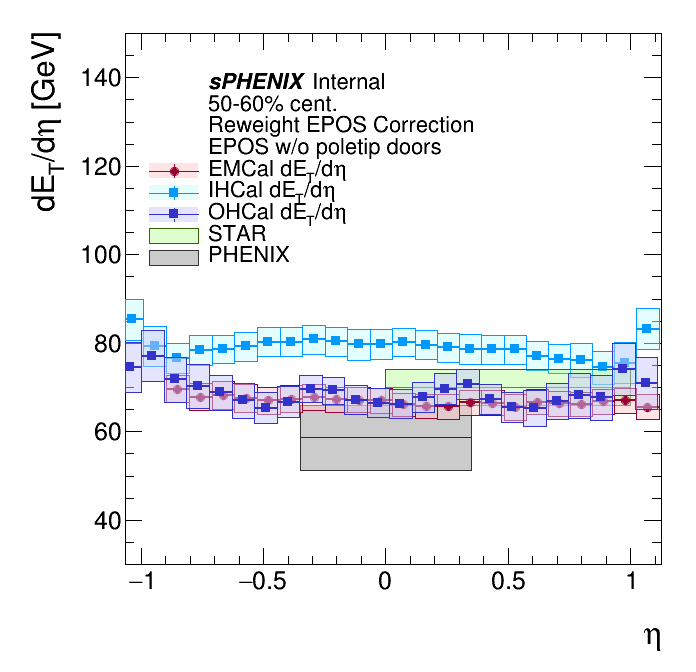

In [231]:
canvas = TCanvas("canvas","",700,700)
leg = ROOT.TLegend(.2,.6,.6,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry("","Reweight EPOS Correction ","")
leg.AddEntry("","EPOS w/o poletip doors","")
leg.AddEntry(emcal_epos_errors,"EMCal dE_{T}/d#eta","lpef")
leg.AddEntry(ihcal_epos_errors,"IHCal dE_{T}/d#eta","lepf")
leg.AddEntry(ohcal_epos_errors,"OHCal dE_{T}/d#eta","lepf")
canvas.SetLeftMargin(0.18)
leg.SetTextSize(0.035)
leg.SetBorderSize(0)
ihcal_epos_errors.GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
ihcal_epos_errors.GetXaxis().SetRangeUser(-1.05,1.1)
ihcal_epos_errors.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
ihcal_epos_errors.GetXaxis().SetTitle("#eta")
ihcal_epos_errors.GetYaxis().SetTitleSize(0.05)
ihcal_epos_errors.GetXaxis().SetLabelSize(0.04)
ihcal_epos_errors.GetYaxis().SetLabelSize(0.04)
emcal_epos_errors.SetMarkerStyle(ROOT.kFullCircle)
emcal_epos_errors.SetLineColor(ROOT.kPink-6)
emcal_epos_errors.SetMarkerColor(ROOT.kPink-6)
emcal_epos_errors.SetFillColorAlpha(ROOT.kRed-10,0.5)
emcal_detdeta_epos.SetMarkerStyle(ROOT.kFullCircle)
emcal_detdeta_epos.SetLineColor(ROOT.kPink-6)
emcal_detdeta_epos.SetMarkerColor(ROOT.kPink-6)
ihcal_epos_errors.SetMarkerStyle(ROOT.kFullSquare)
ihcal_epos_errors.SetLineColor(ROOT.kAzure+7)
ihcal_epos_errors.SetMarkerColor(ROOT.kAzure+7)
ihcal_epos_errors.SetFillColorAlpha(ROOT.kCyan-10,0.5)
ohcal_epos_errors.SetMarkerStyle(ROOT.kFullSquare)
ohcal_epos_errors.SetLineColor(ROOT.kBlue-3)
ohcal_epos_errors.SetMarkerColor(ROOT.kBlue-3)
ohcal_epos_errors.SetFillColorAlpha(ROOT.kBlue-10,0.5)
ihcal_detdeta_epos.SetMarkerStyle(ROOT.kFullSquare)
ihcal_detdeta_epos.SetLineColor(ROOT.kAzure+7)
ihcal_detdeta_epos.SetMarkerColor(ROOT.kAzure+7)
ohcal_detdeta_epos.SetMarkerStyle(ROOT.kFullSquare)
ohcal_detdeta_epos.SetLineColor(ROOT.kBlue-3)
ohcal_detdeta_epos.SetMarkerColor(ROOT.kBlue-3)
ihcal_epos_errors.Draw("A5")
ihcal_detdeta_epos.Draw("P same")

starline = ROOT.TLine(0,starmean[cent],1,starmean[cent]);
phnxline = ROOT.TLine(-0.35,phenixmean[cent],0.35,phenixmean[cent]);
starbox = ROOT.TBox(0,starmean[cent]-staruncert[cent],1,starmean[cent]+staruncert[cent]);
phnxbox = ROOT.TBox(-0.35,phenixmean[cent]-phenixuncert[cent],0.35,phenixmean[cent]+phenixuncert[cent]);
phnxline.SetLineColor(ROOT.kGray+3)
phnxbox.SetFillColorAlpha(ROOT.kBlack,0.2)
phnxbox.SetLineColor(ROOT.kGray+3)
phnxbox.SetLineWidth(1)
starline.SetLineColor(ROOT.kSpring-7)
starbox.SetFillColorAlpha(ROOT.kSpring-4,0.3)
starbox.SetLineWidth(1)
starbox.SetLineColor(ROOT.kSpring-7)
starline.Draw()
starbox.Draw("l")
phnxline.Draw()
phnxbox.Draw("l")
emcal_epos_errors.Draw("5")
emcal_detdeta_epos.Draw("P same")
ohcal_epos_errors.Draw("5")
ohcal_detdeta_epos.Draw("P same")
leg.AddEntry(starbox,"STAR","f")
leg.AddEntry(phnxbox,"PHENIX","f")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/detdeta_reweight_epos_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/detdeta_reweight_ampt_50-60.png has been created


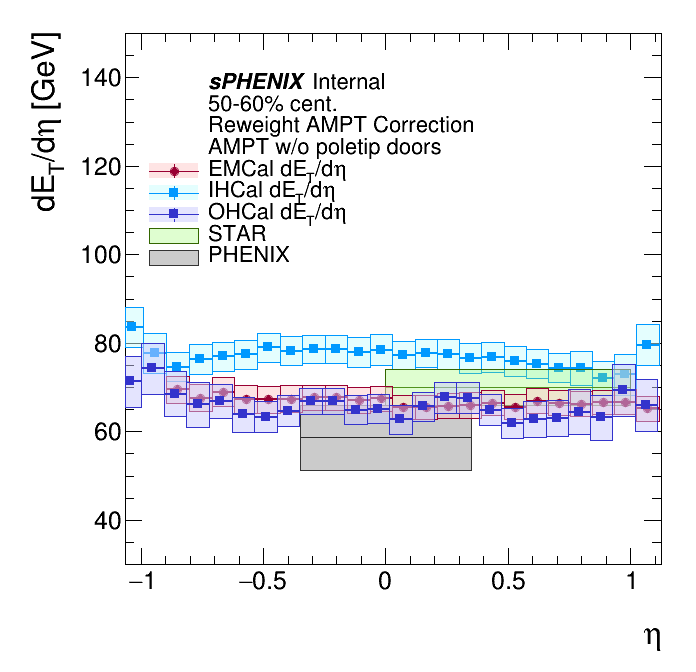

In [232]:
canvas = TCanvas("canvas","",700,700)
leg = ROOT.TLegend(.2,.6,.6,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry("","Reweight AMPT Correction ","")
leg.AddEntry("","AMPT w/o poletip doors","")
leg.AddEntry(emcal_ampt_errors,"EMCal dE_{T}/d#eta","lpef")
leg.AddEntry(ihcal_ampt_errors,"IHCal dE_{T}/d#eta","lepf")
leg.AddEntry(ohcal_ampt_errors,"OHCal dE_{T}/d#eta","lepf")
canvas.SetLeftMargin(0.18)
leg.SetTextSize(0.035)
leg.SetBorderSize(0)
ihcal_ampt_errors.GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
ihcal_ampt_errors.GetXaxis().SetRangeUser(-1.05,1.1)
ihcal_ampt_errors.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
ihcal_ampt_errors.GetXaxis().SetTitle("#eta")
ihcal_ampt_errors.GetYaxis().SetTitleSize(0.05)
ihcal_ampt_errors.GetXaxis().SetLabelSize(0.04)
ihcal_ampt_errors.GetYaxis().SetLabelSize(0.04)
emcal_ampt_errors.SetMarkerStyle(ROOT.kFullCircle)
emcal_ampt_errors.SetLineColor(ROOT.kPink-6)
emcal_ampt_errors.SetMarkerColor(ROOT.kPink-6)
emcal_ampt_errors.SetFillColorAlpha(ROOT.kRed-10,0.5)
emcal_detdeta_ampt.SetMarkerStyle(ROOT.kFullCircle)
emcal_detdeta_ampt.SetLineColor(ROOT.kPink-6)
emcal_detdeta_ampt.SetMarkerColor(ROOT.kPink-6)
ihcal_ampt_errors.SetMarkerStyle(ROOT.kFullSquare)
ihcal_ampt_errors.SetLineColor(ROOT.kAzure+7)
ihcal_ampt_errors.SetMarkerColor(ROOT.kAzure+7)
ihcal_ampt_errors.SetFillColorAlpha(ROOT.kCyan-10,0.5)
ohcal_ampt_errors.SetMarkerStyle(ROOT.kFullSquare)
ohcal_ampt_errors.SetLineColor(ROOT.kBlue-3)
ohcal_ampt_errors.SetMarkerColor(ROOT.kBlue-3)
ohcal_ampt_errors.SetFillColorAlpha(ROOT.kBlue-10,0.5)
ihcal_detdeta_ampt.SetMarkerStyle(ROOT.kFullSquare)
ihcal_detdeta_ampt.SetLineColor(ROOT.kAzure+7)
ihcal_detdeta_ampt.SetMarkerColor(ROOT.kAzure+7)
ohcal_detdeta_ampt.SetMarkerStyle(ROOT.kFullSquare)
ohcal_detdeta_ampt.SetLineColor(ROOT.kBlue-3)
ohcal_detdeta_ampt.SetMarkerColor(ROOT.kBlue-3)
ihcal_ampt_errors.Draw("A5")
ihcal_detdeta_ampt.Draw("P same")

starline = ROOT.TLine(0,starmean[cent],1,starmean[cent]);
phnxline = ROOT.TLine(-0.35,phenixmean[cent],0.35,phenixmean[cent]);
starbox = ROOT.TBox(0,starmean[cent]-staruncert[cent],1,starmean[cent]+staruncert[cent]);
phnxbox = ROOT.TBox(-0.35,phenixmean[cent]-phenixuncert[cent],0.35,phenixmean[cent]+phenixuncert[cent]);
phnxline.SetLineColor(ROOT.kGray+3)
phnxbox.SetFillColorAlpha(ROOT.kBlack,0.2)
phnxbox.SetLineColor(ROOT.kGray+3)
phnxbox.SetLineWidth(1)
starline.SetLineColor(ROOT.kSpring-7)
starbox.SetFillColorAlpha(ROOT.kSpring-4,0.3)
starbox.SetLineWidth(1)
starbox.SetLineColor(ROOT.kSpring-7)
starline.Draw()
starbox.Draw("l")
phnxline.Draw()
phnxbox.Draw("l")
emcal_ampt_errors.Draw("5")
emcal_detdeta_ampt.Draw("P same")
ohcal_ampt_errors.Draw("5")
ohcal_detdeta_ampt.Draw("P same")
leg.AddEntry(starbox,"STAR","f")
leg.AddEntry(phnxbox,"PHENIX","f")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/detdeta_reweight_ampt_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/detdeta_reweight_hijing_full_calo_50-60.png has been created


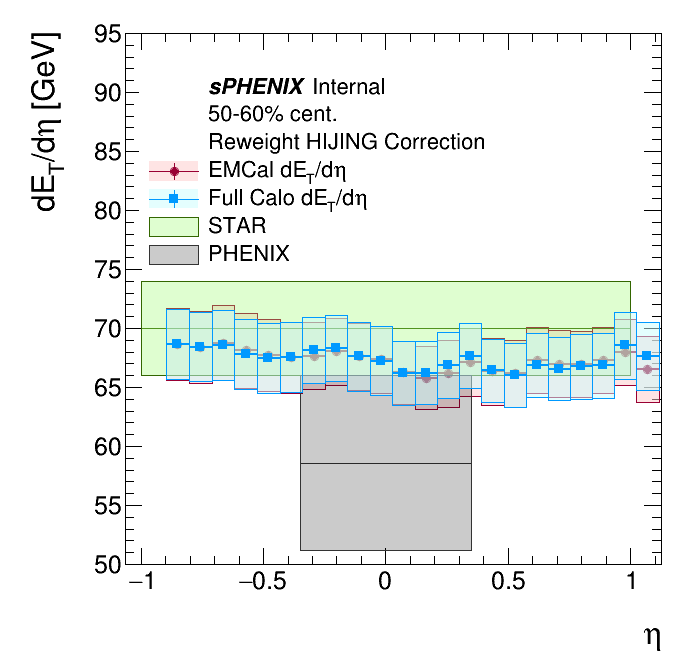

In [49]:
canvas = TCanvas("canvas","",700,700)
leg = ROOT.TLegend(.2,.6,.6,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry("","Reweight HIJING Correction ","")
leg.AddEntry(emcal_hijing_errors,"EMCal dE_{T}/d#eta","lpef")
leg.AddEntry(calo_hijing_errors,"Full Calo dE_{T}/d#eta","lepf")
canvas.SetLeftMargin(0.18)
leg.SetTextSize(0.035)
leg.SetBorderSize(0)
emcal_hijing_errors.GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
emcal_hijing_errors.GetXaxis().SetRangeUser(-1.05,1.1)
emcal_hijing_errors.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
emcal_hijing_errors.GetXaxis().SetTitle("#eta")
emcal_hijing_errors.GetYaxis().SetTitleSize(0.05)
emcal_hijing_errors.GetXaxis().SetLabelSize(0.04)
emcal_hijing_errors.GetYaxis().SetLabelSize(0.04)

emcal_hijing_errors.SetMarkerStyle(ROOT.kFullCircle)
emcal_hijing_errors.SetLineColor(ROOT.kPink-6)
emcal_hijing_errors.SetMarkerColor(ROOT.kPink-6)
emcal_hijing_errors.SetFillColorAlpha(ROOT.kRed-10,0.5)
emcal_detdeta_hijing.SetMarkerStyle(ROOT.kFullCircle)
emcal_detdeta_hijing.SetLineColor(ROOT.kPink-6)
emcal_detdeta_hijing.SetMarkerColor(ROOT.kPink-6)

calo_hijing_errors.SetMarkerStyle(ROOT.kFullSquare)
calo_hijing_errors.SetLineColor(ROOT.kAzure+7)
calo_hijing_errors.SetMarkerColor(ROOT.kAzure+7)
calo_hijing_errors.SetFillColorAlpha(ROOT.kCyan-10,0.5)
calo_detdeta_hijing.SetMarkerStyle(ROOT.kFullSquare)
calo_detdeta_hijing.SetLineColor(ROOT.kAzure+7)
calo_detdeta_hijing.SetMarkerColor(ROOT.kAzure+7)

emcal_hijing_errors.Draw("A5")
emcal_detdeta_hijing.Draw("P same")

starline = ROOT.TLine(-1,starmean[cent],1,starmean[cent]);
phnxline = ROOT.TLine(-0.35,phenixmean[cent],0.35,phenixmean[cent]);
starbox = ROOT.TBox(-1,starmean[cent]-staruncert[cent],1,starmean[cent]+staruncert[cent]);
phnxbox = ROOT.TBox(-0.35,phenixmean[cent]-phenixuncert[cent],0.35,phenixmean[cent]+phenixuncert[cent]);
phnxline.SetLineColor(ROOT.kGray+3)
phnxbox.SetFillColorAlpha(ROOT.kBlack,0.2)
phnxbox.SetLineColor(ROOT.kGray+3)
phnxbox.SetLineWidth(1)
starline.SetLineColor(ROOT.kSpring-7)
starbox.SetFillColorAlpha(ROOT.kSpring-4,0.3)
starbox.SetLineWidth(1)
starbox.SetLineColor(ROOT.kSpring-7)
starline.Draw()
starbox.Draw("l")
phnxline.Draw()
phnxbox.Draw("l")
calo_hijing_errors.Draw("5")
calo_detdeta_hijing.Draw("P same")
leg.AddEntry(starbox,"STAR","f")
leg.AddEntry(phnxbox,"PHENIX","f")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/nominal_detdeta_plots/detdeta_reweight_hijing_full_calo_'+cent+'.png')

Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/detdeta_reweight_hijing_emcal_ohcal_full_calo_with_comp_0-5.png has been created


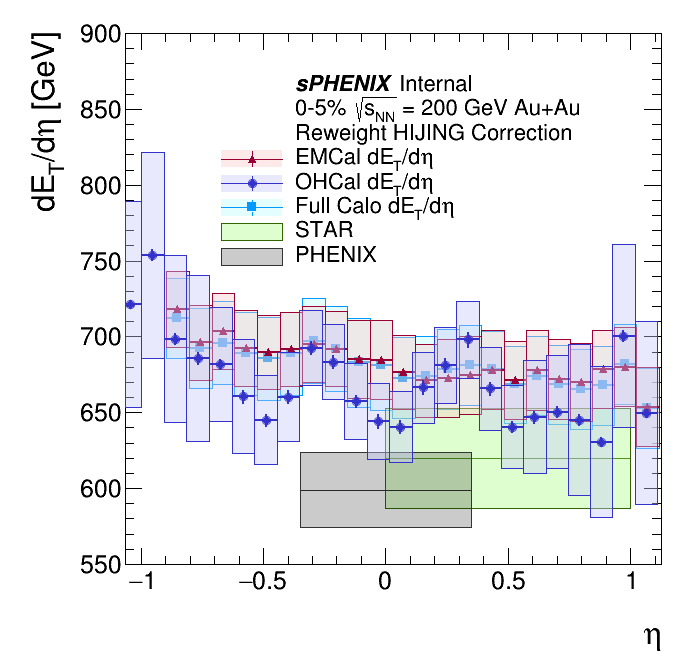

In [9]:
canvas = TCanvas("canvas","",700,700)
leg = ROOT.TLegend(.3,.6,.8,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
cent_leg = f"{cent}%"
leg.AddEntry("",cent_leg+" #sqrt{s_{NN}} = 200 GeV Au+Au","")
leg.AddEntry("","Reweight HIJING Correction ","")
leg.AddEntry(emcal_hijing_errors,"EMCal dE_{T}/d#eta","lpef")
leg.AddEntry(ohcal_hijing_errors,"OHCal dE_{T}/d#eta","lepf")
leg.AddEntry(calo_hijing_errors,"Full Calo dE_{T}/d#eta","lepf")
canvas.SetLeftMargin(0.18)
leg.SetTextSize(0.035)
leg.SetBorderSize(0)
calo_hijing_errors.GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
calo_hijing_errors.GetXaxis().SetRangeUser(-1.05,1.1)
calo_hijing_errors.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
calo_hijing_errors.GetXaxis().SetTitle("#eta")
calo_hijing_errors.GetYaxis().SetTitleSize(0.05)
calo_hijing_errors.GetXaxis().SetLabelSize(0.04)
calo_hijing_errors.GetYaxis().SetLabelSize(0.04)

emcal_hijing_errors.SetMarkerStyle(22)
emcal_hijing_errors.SetLineColor(ROOT.kPink-6)
emcal_hijing_errors.SetMarkerColor(ROOT.kPink-6)
emcal_hijing_errors.SetFillColorAlpha(ROOT.kRed-10,0.4)
emcal_detdeta_hijing.SetMarkerStyle(22)
emcal_detdeta_hijing.SetLineColor(ROOT.kPink-6)
emcal_detdeta_hijing.SetMarkerColor(ROOT.kPink-6)

calo_hijing_errors.SetMarkerStyle(ROOT.kFullSquare)
calo_hijing_errors.SetLineColor(ROOT.kAzure+7)
calo_hijing_errors.SetMarkerColor(ROOT.kAzure+7)
calo_hijing_errors.SetFillColorAlpha(ROOT.kCyan-10,0.5)
calo_detdeta_hijing.SetMarkerStyle(ROOT.kFullSquare)
calo_detdeta_hijing.SetLineColor(ROOT.kAzure+7)
calo_detdeta_hijing.SetMarkerColor(ROOT.kAzure+7)
calo_detdeta_hijing.SetMarkerSize(1.2)
calo_hijing_errors.SetMarkerSize(1.2)

ohcal_hijing_errors.SetMarkerStyle(ROOT.kFullCircle)
ohcal_hijing_errors.SetLineColor(ROOT.kBlue-3)
ohcal_hijing_errors.SetMarkerColor(ROOT.kBlue-3)
ohcal_hijing_errors.SetFillColorAlpha(ROOT.kBlue-10,0.4)
ohcal_detdeta_hijing.SetMarkerStyle(ROOT.kFullCircle)
ohcal_detdeta_hijing.SetLineColor(ROOT.kBlue-3)
ohcal_detdeta_hijing.SetMarkerColor(ROOT.kBlue-3)

calo_hijing_errors.Draw("A5")
calo_detdeta_hijing.Draw("P same")

starline = ROOT.TLine(0,starmean[cent],1,starmean[cent]);
phnxline = ROOT.TLine(-0.35,phenixmean[cent],0.35,phenixmean[cent]);
starbox = ROOT.TBox(0,starmean[cent]-staruncert[cent],1,starmean[cent]+staruncert[cent]);
phnxbox = ROOT.TBox(-0.35,phenixmean[cent]-phenixuncert[cent],0.35,phenixmean[cent]+phenixuncert[cent]);
phnxline.SetLineColor(ROOT.kGray+3)
phnxbox.SetFillColorAlpha(ROOT.kBlack,0.2)
phnxbox.SetLineColor(ROOT.kGray+3)
phnxbox.SetLineWidth(1)
starline.SetLineColor(ROOT.kSpring-7)
starbox.SetFillColorAlpha(ROOT.kSpring-4,0.3)
starbox.SetLineWidth(1)
starbox.SetLineColor(ROOT.kSpring-7)
starline.Draw()
starbox.Draw("l")
phnxline.Draw()
phnxbox.Draw("l")
emcal_hijing_errors.Draw("5")
emcal_detdeta_hijing.Draw("P same")
ohcal_hijing_errors.Draw("5")
ohcal_detdeta_hijing.Draw("P same")
leg.AddEntry(starbox,"STAR","f")
leg.AddEntry(phnxbox,"PHENIX","f")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/detdeta_reweight_hijing_emcal_ohcal_full_calo_with_comp_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/detdeta_reweight_hijing_emcal_ohcal_full_calo_50-60.png has been created


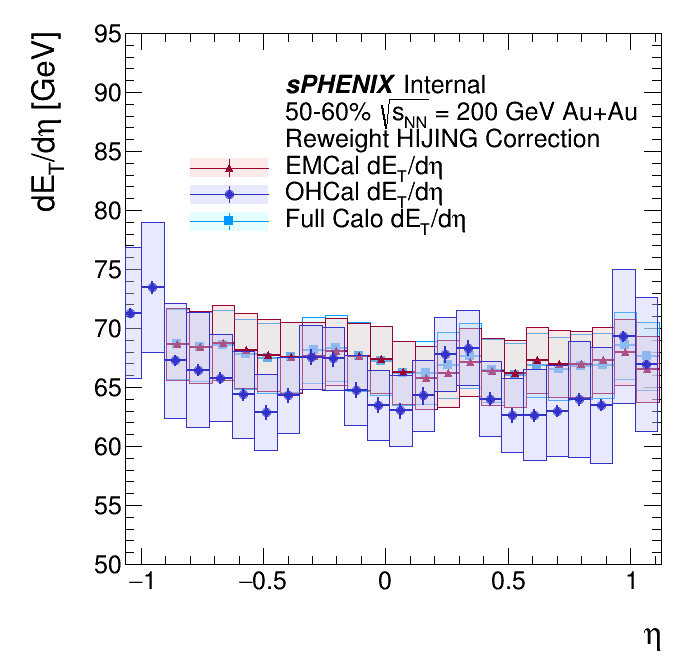

In [47]:
canvas = TCanvas("canvas","",700,700)
leg = ROOT.TLegend(.25,.65,.89,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
cent_leg = f"{cent}%"
leg.AddEntry("",cent_leg+" #sqrt{s_{NN}} = 200 GeV Au+Au","")
leg.AddEntry("","Reweight HIJING Correction ","")
leg.AddEntry(emcal_hijing_errors,"EMCal dE_{T}/d#eta","lpef")
leg.AddEntry(ohcal_hijing_errors,"OHCal dE_{T}/d#eta","lepf")
leg.AddEntry(calo_hijing_errors,"Full Calo dE_{T}/d#eta","lepf")
canvas.SetLeftMargin(0.18)
leg.SetTextSize(0.04)
leg.SetBorderSize(0)
calo_hijing_errors.GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
calo_hijing_errors.GetXaxis().SetRangeUser(-1.05,1.1)
calo_hijing_errors.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
calo_hijing_errors.GetXaxis().SetTitle("#eta")
calo_hijing_errors.GetYaxis().SetTitleSize(0.05)
calo_hijing_errors.GetXaxis().SetLabelSize(0.04)
calo_hijing_errors.GetYaxis().SetLabelSize(0.04)

emcal_hijing_errors.SetMarkerStyle(22)
emcal_hijing_errors.SetLineColor(ROOT.kPink-6)
emcal_hijing_errors.SetMarkerColor(ROOT.kPink-6)
emcal_hijing_errors.SetFillColorAlpha(ROOT.kRed-10,0.4)
emcal_detdeta_hijing.SetMarkerStyle(22)
emcal_detdeta_hijing.SetLineColor(ROOT.kPink-6)
emcal_detdeta_hijing.SetMarkerColor(ROOT.kPink-6)

calo_hijing_errors.SetMarkerStyle(ROOT.kFullSquare)
calo_hijing_errors.SetLineColor(ROOT.kAzure+7)
calo_hijing_errors.SetMarkerColor(ROOT.kAzure+7)
calo_hijing_errors.SetFillColorAlpha(ROOT.kCyan-10,0.5)
calo_detdeta_hijing.SetMarkerStyle(ROOT.kFullSquare)
calo_detdeta_hijing.SetLineColor(ROOT.kAzure+7)
calo_detdeta_hijing.SetMarkerColor(ROOT.kAzure+7)
calo_detdeta_hijing.SetMarkerSize(1.2)
calo_hijing_errors.SetMarkerSize(1.2)

ohcal_hijing_errors.SetMarkerStyle(ROOT.kFullCircle)
ohcal_hijing_errors.SetLineColor(ROOT.kBlue-3)
ohcal_hijing_errors.SetMarkerColor(ROOT.kBlue-3)
ohcal_hijing_errors.SetFillColorAlpha(ROOT.kBlue-10,0.4)
ohcal_detdeta_hijing.SetMarkerStyle(ROOT.kFullCircle)
ohcal_detdeta_hijing.SetLineColor(ROOT.kBlue-3)
ohcal_detdeta_hijing.SetMarkerColor(ROOT.kBlue-3)

calo_hijing_errors.Draw("A5")
calo_detdeta_hijing.Draw("P same")

starline = ROOT.TLine(0,starmean[cent],1,starmean[cent]);
phnxline = ROOT.TLine(-0.35,phenixmean[cent],0.35,phenixmean[cent]);
starbox = ROOT.TBox(0,starmean[cent]-staruncert[cent],1,starmean[cent]+staruncert[cent]);
phnxbox = ROOT.TBox(-0.35,phenixmean[cent]-phenixuncert[cent],0.35,phenixmean[cent]+phenixuncert[cent]);
phnxline.SetLineColor(ROOT.kGray+3)
phnxbox.SetFillColorAlpha(ROOT.kBlack,0.2)
phnxbox.SetLineColor(ROOT.kGray+3)
phnxbox.SetLineWidth(1)
starline.SetLineColor(ROOT.kSpring-7)
starbox.SetFillColorAlpha(ROOT.kSpring-4,0.3)
starbox.SetLineWidth(1)
starbox.SetLineColor(ROOT.kSpring-7)
#starline.Draw()
#starbox.Draw("l")
#phnxline.Draw()
#phnxbox.Draw("l")
emcal_hijing_errors.Draw("5")
emcal_detdeta_hijing.Draw("P same")
ohcal_hijing_errors.Draw("5")
ohcal_detdeta_hijing.Draw("P same")
#leg.AddEntry(starbox,"STAR","f")
#leg.AddEntry(phnxbox,"PHENIX","f")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/detdeta_reweight_hijing_emcal_ohcal_full_calo_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/detdeta_reweight_hijing_detector_comp_50-60.png has been created


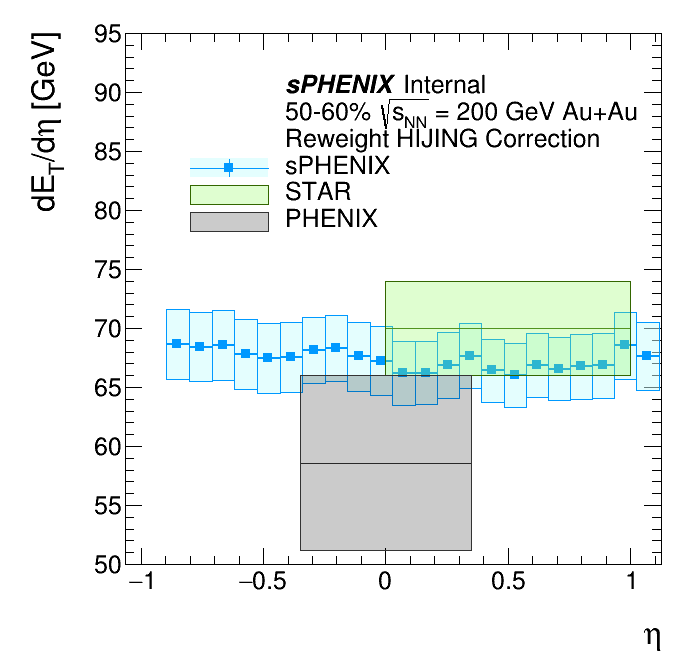

In [48]:
canvas = TCanvas("canvas","",700,700)
leg = ROOT.TLegend(.25,.65,.89,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
cent_leg = f"{cent}%"
leg.AddEntry("",cent_leg+" #sqrt{s_{NN}} = 200 GeV Au+Au","")
leg.AddEntry("","Reweight HIJING Correction ","")
#leg.AddEntry(emcal_hijing_errors,"EMCal dE_{T}/d#eta","lpef")
#leg.AddEntry(ohcal_hijing_errors,"OHCal dE_{T}/d#eta","lepf")
leg.AddEntry(calo_hijing_errors,"sPHENIX","lepf")
canvas.SetLeftMargin(0.18)
leg.SetTextSize(0.04)
leg.SetBorderSize(0)
calo_hijing_errors.GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
calo_hijing_errors.GetXaxis().SetRangeUser(-1.05,1.1)
calo_hijing_errors.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
calo_hijing_errors.GetXaxis().SetTitle("#eta")
calo_hijing_errors.GetYaxis().SetTitleSize(0.05)
calo_hijing_errors.GetXaxis().SetLabelSize(0.04)
calo_hijing_errors.GetYaxis().SetLabelSize(0.04)

emcal_hijing_errors.SetMarkerStyle(22)
emcal_hijing_errors.SetLineColor(ROOT.kPink-6)
emcal_hijing_errors.SetMarkerColor(ROOT.kPink-6)
emcal_hijing_errors.SetFillColorAlpha(ROOT.kRed-10,0.4)
emcal_detdeta_hijing.SetMarkerStyle(22)
emcal_detdeta_hijing.SetLineColor(ROOT.kPink-6)
emcal_detdeta_hijing.SetMarkerColor(ROOT.kPink-6)

calo_hijing_errors.SetMarkerStyle(ROOT.kFullSquare)
calo_hijing_errors.SetLineColor(ROOT.kAzure+7)
calo_hijing_errors.SetMarkerColor(ROOT.kAzure+7)
calo_hijing_errors.SetFillColorAlpha(ROOT.kCyan-10,0.5)
calo_detdeta_hijing.SetMarkerStyle(ROOT.kFullSquare)
calo_detdeta_hijing.SetLineColor(ROOT.kAzure+7)
calo_detdeta_hijing.SetMarkerColor(ROOT.kAzure+7)
calo_detdeta_hijing.SetMarkerSize(1.2)
calo_hijing_errors.SetMarkerSize(1.2)

ohcal_hijing_errors.SetMarkerStyle(ROOT.kFullCircle)
ohcal_hijing_errors.SetLineColor(ROOT.kBlue-3)
ohcal_hijing_errors.SetMarkerColor(ROOT.kBlue-3)
ohcal_hijing_errors.SetFillColorAlpha(ROOT.kBlue-10,0.4)
ohcal_detdeta_hijing.SetMarkerStyle(ROOT.kFullCircle)
ohcal_detdeta_hijing.SetLineColor(ROOT.kBlue-3)
ohcal_detdeta_hijing.SetMarkerColor(ROOT.kBlue-3)

calo_hijing_errors.Draw("A5")
calo_detdeta_hijing.Draw("P same")

starline = ROOT.TLine(0,starmean[cent],1,starmean[cent]);
phnxline = ROOT.TLine(-0.35,phenixmean[cent],0.35,phenixmean[cent]);
starbox = ROOT.TBox(0,starmean[cent]-staruncert[cent],1,starmean[cent]+staruncert[cent]);
phnxbox = ROOT.TBox(-0.35,phenixmean[cent]-phenixuncert[cent],0.35,phenixmean[cent]+phenixuncert[cent]);
phnxline.SetLineColor(ROOT.kGray+3)
phnxbox.SetFillColorAlpha(ROOT.kBlack,0.2)
phnxbox.SetLineColor(ROOT.kGray+3)
phnxbox.SetLineWidth(1)
starline.SetLineColor(ROOT.kSpring-7)
starbox.SetFillColorAlpha(ROOT.kSpring-4,0.3)
starbox.SetLineWidth(1)
starbox.SetLineColor(ROOT.kSpring-7)
starline.Draw()
starbox.Draw("l")
phnxline.Draw()
phnxbox.Draw("l")
#emcal_hijing_errors.Draw("5")
#emcal_detdeta_hijing.Draw("P same")
#ohcal_hijing_errors.Draw("5")
#ohcal_detdeta_hijing.Draw("P same")
leg.AddEntry(starbox,"STAR","f")
leg.AddEntry(phnxbox,"PHENIX","f")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/detdeta_reweight_hijing_detector_comp_'+cent+'.png')

In [12]:
emean = 0
omean = 0
cmean = 0
eerr = 0
oerr = 0
cerr = 0
for i in range(1, emcal_detdeta_hijing.GetNbinsX() + 1):
    omean += ohcal_detdeta_hijing.GetBinContent(i)
    oerr += ohcal_unc.GetBinContent(i)
    if i > 2:
        emean += emcal_detdeta_hijing.GetBinContent(i)
        cmean += calo_detdeta_hijing.GetBinContent(i)
        eerr += emcal_unc.GetBinContent(i)
        cerr += calo_unc.GetBinContent(i)
emean /= 22
cmean /= 22
omean /= 24
eerr /= 22
cerr /= 22
oerr /= 24
print(emean, cmean, omean)
print(eerr, cerr, oerr)

682.9593478116122 680.9350419477983 670.9072570800781
25.340132626620207 26.83485273881392 38.59892749786377


In [217]:
print((calo_detdeta_hijing.GetBinContent(11) + calo_detdeta_hijing.GetBinContent(12))/2.0)
print((calo_unc.GetBinContent(11) + calo_unc.GetBinContent(12))/2.0)
print((emcal_detdeta_hijing.GetBinContent(11) + emcal_detdeta_hijing.GetBinContent(12))/2.0)
print((emcal_unc.GetBinContent(11) + emcal_unc.GetBinContent(12))/2.0)
print((ohcal_detdeta_hijing.GetBinContent(11) + ohcal_detdeta_hijing.GetBinContent(12))/2.0)
print((ohcal_unc.GetBinContent(11) + ohcal_unc.GetBinContent(12))/2.0)

114.97966766357422
4.8453593254089355
115.04010772705078
4.524327278137207
109.45148086547852
5.124257564544678


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


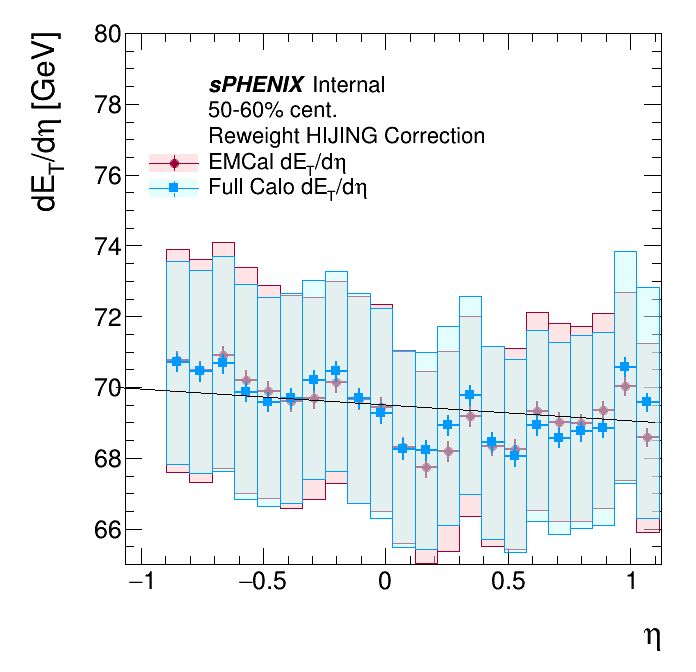

In [86]:
canvas = TCanvas("canvas","",700,700)
leg = ROOT.TLegend(.2,.7,.6,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry("","Reweight HIJING Correction ","")
leg.AddEntry(emcal_hijing_errors,"EMCal dE_{T}/d#eta","lpef")
leg.AddEntry(calo_hijing_errors,"Full Calo dE_{T}/d#eta","lepf")
canvas.SetLeftMargin(0.18)
leg.SetTextSize(0.035)
leg.SetBorderSize(0)
emcal_hijing_errors.GetYaxis().SetRangeUser(65,80)
emcal_hijing_errors.GetXaxis().SetRangeUser(-1.05,1.1)
emcal_hijing_errors.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
emcal_hijing_errors.GetXaxis().SetTitle("#eta")
emcal_hijing_errors.GetYaxis().SetTitleSize(0.05)
emcal_hijing_errors.GetXaxis().SetLabelSize(0.04)
emcal_hijing_errors.GetYaxis().SetLabelSize(0.04)

emcal_hijing_errors.SetMarkerStyle(ROOT.kFullCircle)
emcal_hijing_errors.SetLineColor(ROOT.kPink-6)
emcal_hijing_errors.SetMarkerColor(ROOT.kPink-6)
emcal_hijing_errors.SetFillColorAlpha(ROOT.kRed-10,0.5)
emcal_detdeta_hijing.SetMarkerStyle(ROOT.kFullCircle)
emcal_detdeta_hijing.SetLineColor(ROOT.kPink-6)
emcal_detdeta_hijing.SetMarkerColor(ROOT.kPink-6)

calo_hijing_errors.SetMarkerStyle(ROOT.kFullSquare)
calo_hijing_errors.SetLineColor(ROOT.kAzure+7)
calo_hijing_errors.SetMarkerColor(ROOT.kAzure+7)
calo_hijing_errors.SetFillColorAlpha(ROOT.kCyan-10,0.5)
calo_detdeta_hijing.SetMarkerStyle(ROOT.kFullSquare)
calo_detdeta_hijing.SetLineColor(ROOT.kAzure+7)
calo_detdeta_hijing.SetMarkerColor(ROOT.kAzure+7)

emcal_hijing_errors.Draw("A5")
emcal_detdeta_hijing.Draw("P same")


calo_hijing_errors.Draw("5")
calo_detdeta_hijing.Draw("P same")
line = ROOT.TLine(-1.1,70,1.1,69)
line.Draw("same")
leg.Draw()
canvas.Draw()